In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
company=pd.read_csv('C:/Users/PMLS/Downloads/50_Startups.csv')
x = company.iloc[:, :-1].values
y = company.iloc[:,4].values

company.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

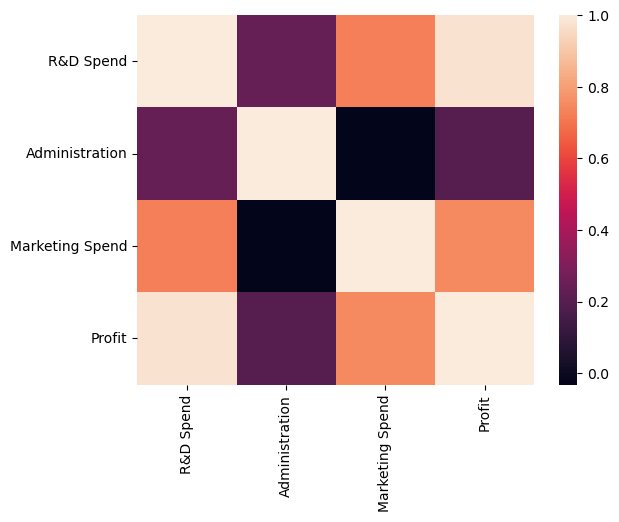

In [8]:
numeric_data = company.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr())


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
x[:, 3] = label_encoder.fit_transform(x[:, 3])
# ColumnTransformer for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ("encoder", OneHotEncoder(), [3])  # Apply OneHotEncoder to column at index 3
    ],
    remainder="passthrough"  # Keep the remaining columns as they are
)

# Apply the transformations
x = column_transformer.fit_transform(x)

print(x[0])



[0.0 0.0 1.0 48 136897.8 471784.1]


In [15]:
x=x[:,1:]

In [17]:
print(x[0])

[0.0 1.0 48 136897.8 471784.1]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

In [21]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred =regressor.predict(x_test)
print(y_pred)

[100815.65143643 141065.32323456 140351.4842569   69602.81317407
 171849.80561966 115796.48839866  64138.93341569  88177.53284686
 114766.47156368 165080.49074038]


In [24]:
print (regressor.coef_)

[-2.60445258e+03 -1.36337493e+03  2.41200148e+03  1.85223167e-02
  4.22507363e-02]


In [25]:
print (regressor.intercept_)

44393.20563132753


In [27]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9217139712234428